In [1]:
import pandas as pd
import numpy as np
import os
import datetime
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap

In [58]:
#('u.item', sep='|', names=m_cols , encoding='latin-1')
df = pd.read_csv(os.path.join('/Users/jon/GA/W1/mass_shootings.csv'),encoding='latin-1',engine='python')

In [59]:
df.dtypes

S#                        int64
Title                    object
Location                 object
Date                     object
Incident Area            object
Open/Close Location      object
Target                   object
Cause                    object
Summary                  object
Fatalities                int64
Injured                   int64
Total victims             int64
Policeman Killed        float64
Age                      object
Employeed (Y/N)         float64
Employed at              object
Mental Health Issues     object
Race                     object
Gender                   object
Latitude                float64
Longitude               float64
dtype: object

In [33]:
df['event'] = 1
# df['new'] = df['W'] + df['Y']
#df['location'] = df['Latitude'] + df['Longitude']
#df['YearQuarter'] = df[['Year','Quarter']].apply(lambda x : '{}{}'.format(x[0],x[1]), axis=1)
df['location'] = df[['Latitude', 'Longitude']].apply(lambda x: '({},{})'.format(x[0],x[1]), axis=1)
df

,S#,Title,Location,Date,Incident Area,Open/Close Location,Target,Cause,Summary,Fatalities,...,Age,Employeed (Y/N),Employed at,Mental Health Issues,Race,Gender,Latitude,Longitude,event,location
0,1,Texas church mass shooting,"Sutherland Springs, TX",11/5/2017,Church,Close,random,unknown,"Devin Patrick Kelley, 26, an ex-air force offi...",26,...,26,NaN,NaN,No,White,M,NaN,NaN,1,"(nan,nan)"
1,2,Walmart shooting in suburban Denver,"Thornton, CO",11/1/2017,Wal-Mart,Open,random,unknown,"Scott Allen Ostrem, 47, walked into a Walmart ...",3,...,47,NaN,NaN,No,White,M,NaN,NaN,1,"(nan,nan)"
2,3,Edgewood businees park shooting,"Edgewood, MD",10/18/2017,Remodeling Store,Close,coworkers,unknown,"Radee Labeeb Prince, 37, fatally shot three pe...",3,...,37,NaN,Advance Granite Store,No,Black,M,NaN,NaN,1,"(nan,nan)"
3,4,Las Vegas Strip mass shooting,"Las Vegas, NV",10/1/2017,Las Vegas Strip Concert outside Mandala Bay,Open,random,unknown,"Stephen Craig Paddock, opened fire from the 32...",59,...,64,NaN,NaN,Unclear,White,M,36.181271,-115.134132,1,"(36.181271,-115.13413200000001)"
4,5,San Francisco UPS shooting,"San Francisco, CA",6/14/2017,UPS facility,Close,coworkers,NaN,"Jimmy Lam, 38, fatally shot three coworkers an...",3,...,38,1.0,NaN,Yes,Asian,M,NaN,NaN,1,"(nan,nan)"
5,6,Pennsylvania supermarket shooting,"Tunkhannock, PA",6/7/2017,Weis grocery,Close,coworkers,terrorism,"Randy Stair, a 24-year-old worker at Weis groc...",3,...,24,1.0,Weis grocery,Unclear,White,M,NaN,NaN,1,"(nan,nan)"
6,7,Florida awning manufacturer shooting,"Orlando, Florida",6/5/2017,manufacturer Fiamma Inc.,Close,coworkers,unemployement,"John Robert Neumann, Jr., 45, a former employe...",5,...,45,1.0,manufacturer Fiamma Inc.,Unclear,NaN,M,NaN,NaN,1,"(nan,nan)"
7,8,Rural Ohio nursing home shooting,"Kirkersville, Ohio",5/12/2017,a nursing home,Close,coworkers,NaN,"Thomas Hartless, 43, shot and killed a former ...",3,...,43,1.0,some nursing home,Yes,White,M,NaN,NaN,1,"(nan,nan)"
8,9,Fresno downtown shooting,"Fresno, California",4/18/2017,a street in downtown,Open,random,racism,"Kori Ali Muhammad, 39, opened fire along a str...",3,...,39,NaN,NaN,Unclear,Black,M,NaN,NaN,1,"(nan,nan)"
9,10,Fort Lauderdale airport shooting,"Fort Lauderdale, Florida",1/6/2017,baggage claim area of the airport,Close,random,terrorism,"Esteban Santiago, 26, flew from Alaska to Fort...",5,...,26,NaN,NaN,Yes,Latino,M,NaN,NaN,1,"(nan,nan)"


In [34]:
df['Date'] = pd.to_datetime(df['Date'], format="%m/%d/%Y").dt.year

In [35]:
df = df.drop(df[df.Date > 2016].index)
byYear = df.groupby('Date')['event']
shootings = byYear.sum()
shootings.mean()

7.6341463414634143

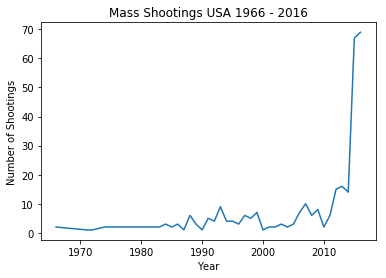

In [36]:
plt.plot(shootings)
plt.title('Mass Shootings USA 1966 - 2016')
plt.ylabel('Number of Shootings')
plt.xlabel('Year')
plt.show()

/anaconda3/envs/DataScience/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/anaconda3/envs/DataScience/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


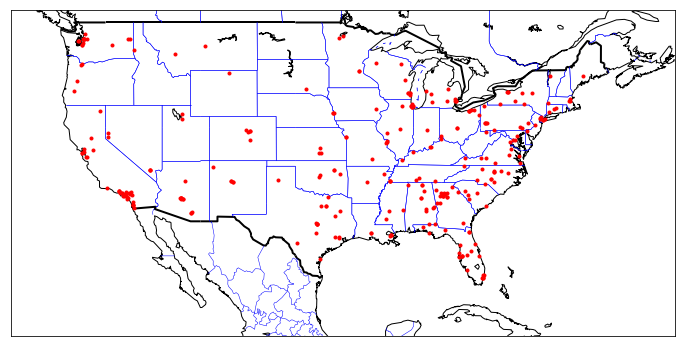

In [57]:
plt.figure(figsize=(12,6))
m = Basemap(projection='mill',
                llcrnrlat=20,
                llcrnrlon=-130,
                urcrnrlat=50,
                urcrnrlon=-60,
                resolution='l')  # Miller proj, USA

m.drawcoastlines()
m.drawcountries(linewidth=2)
m.drawstates(color='b')
#m.fillcontinents(color = 'white')


# sample data to plot with
lons = df['Longitude']  # degrees
lats = df['Latitude']


# plotting points
for lon, lat in zip(lons, lats):
    x, y = m.projtran(lon, lat)        # coord transformation      
    m.plot(x, y, 'r',marker='.', markersize=6)  # needs grid coords to plot
    
    
plt.show()

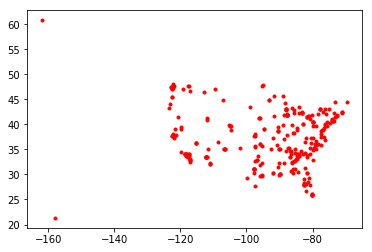

In [38]:
plt.scatter(df['Longitude'], df['Latitude'], marker='.', color="red")

In [39]:
df.dtypes

S#                        int64
Title                    object
Location                 object
Date                      int64
Incident Area            object
Open/Close Location      object
Target                   object
Cause                    object
Summary                  object
Fatalities                int64
Injured                   int64
Total victims             int64
Policeman Killed        float64
Age                      object
Employeed (Y/N)         float64
Employed at              object
Mental Health Issues     object
Race                     object
Gender                   object
Latitude                float64
Longitude               float64
event                     int64
location                 object
dtype: object

In [40]:
df = df.drop(df[df.Date > 2017].index)
byYear = df.groupby('Date')['Fatalities']
fatalities = byYear.sum()
fatalities

Date
1966     22
1971      2
1972     10
1974      4
1976      8
1979      4
1982     10
1983     14
1984     31
1985      3
1986     17
1987      6
1988     17
1989     19
1990     12
1991     47
1992     11
1993     29
1994     12
1995     14
1996     12
1997     18
1998     15
1999     45
2000      7
2001      8
2002      7
2003     15
2004     11
2005     21
2006     30
2007     65
2008     28
2009     69
2010      9
2011     29
2012     99
2013     76
2014     45
2015    226
2016    193
Name: Fatalities, dtype: int64

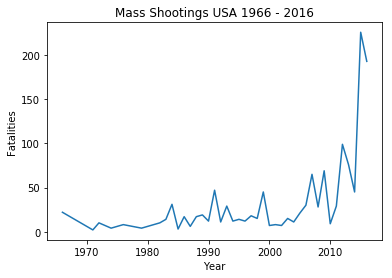

In [41]:
plt.plot(fatalities)
plt.title('Mass Shootings USA 1966 - 2016')
plt.ylabel('Fatalities')
plt.xlabel('Year')
plt.show()